# Image classification

### Import TensorFlow and other libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import pathlib
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from tensorflow.keras import regularizers

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import InceptionV3

from tensorflow.keras.preprocessing.image import ImageDataGenerator 

### Data from Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!ls "/content/drive/My Drive"

'Colab Notebooks'
 data.zip
'Docs 190216'
 EvP445FXAAQA7IE.jfif
'HTML5 and CSS3 All-in-one.pdf'
'Learning Tableau 2019 Tools for Business Intelligence, data prep, and visual analytics.pdf'
'Tableau For Dummies - Wiley.pdf'


In [4]:
import zipfile

zipRef = zipfile.ZipFile("/content/drive/My Drive/data.zip", 'r')
zipRef.extractall("/data")
zipRef.close()

In [5]:
dataDir = '/data/data'

### Data Generator

In [6]:
batchSize = 32
imgHeight = 200
imgWidth = 200

dataGen = ImageDataGenerator(validation_split=0.2, rescale=1.0/255)

trainGenerator = dataGen.flow_from_directory(dataDir, subset='training', target_size=(imgHeight, imgWidth), class_mode='sparse')
valGenerator = dataGen.flow_from_directory(dataDir, subset='validation', target_size=(imgHeight, imgWidth), class_mode='sparse')

Found 11517 images belonging to 4 classes.
Found 2877 images belonging to 4 classes.


### Label Names

In [7]:
temp = trainGenerator.class_indices

labelNames = dict([(y,x) for x,y in temp.items()])

print(labelNames)

{0: 'asian', 1: 'black', 2: 'indian', 3: 'white'}


### VGG 16

In [91]:
model = None
baseModel = None

In [8]:
numClasses = 4

baseModel = VGG16(input_shape=(imgHeight, imgWidth, 3), 
                  include_top=False, weights='imagenet', )

baseModel.trainable = False

x = layers.Flatten()(baseModel.output)

x = layers.Dense(512, activation='relu', kernel_regularizer = tf.keras.regularizers.l2(l2 = 0.01))(x)

x = layers.Dropout(0.5)(x)

x = layers.Dense(256, activation='relu', kernel_regularizer = tf.keras.regularizers.l2(l2 = 0.01))(x)

x = layers.Dropout(0.4)(x)

x = layers.Dense(128, activation='relu', kernel_regularizer = tf.keras.regularizers.l2(l2 = 0.01))(x)

x = layers.Dropout(0.2)(x)

x = layers.Dense(numClasses, activation='sigmoid')(x)


model = tf.keras.models.Model(baseModel.input, x)

model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.00001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

58892288/58889256 [==============================] - 0s 0us/step


### Model summary

In [9]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 200, 200, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 200, 200, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 200, 200, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 100, 100, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 100, 100, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 100, 100, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 50, 50, 128)       0     

## Train the model

### Flow from Dir

In [10]:
epochs=30

vggHistory = model.fit(
  trainGenerator,
  validation_data=valGenerator,
  epochs=epochs
)

Epoch 1/30
360/360 [==============================] - 114s 291ms/step - loss: 15.5541 - accuracy: 0.3329 - val_loss: 13.0073 - val_accuracy: 0.4380
Epoch 2/30
360/360 [==============================] - 101s 282ms/step - loss: 12.4001 - accuracy: 0.4346 - val_loss: 10.5677 - val_accuracy: 0.5335
Epoch 3/30
360/360 [==============================] - 101s 282ms/step - loss: 10.1763 - accuracy: 0.5039 - val_loss: 8.9259 - val_accuracy: 0.5871
Epoch 4/30
360/360 [==============================] - 101s 281ms/step - loss: 8.7019 - accuracy: 0.5520 - val_loss: 7.8848 - val_accuracy: 0.6406
Epoch 5/30
360/360 [==============================] - 101s 281ms/step - loss: 7.7843 - accuracy: 0.5956 - val_loss: 7.2253 - val_accuracy: 0.6444
Epoch 6/30
360/360 [==============================] - 101s 281ms/step - loss: 7.1550 - accuracy: 0.6176 - val_loss: 6.6921 - val_accuracy: 0.6663
Epoch 7/30
360/360 [==============================] - 101s 282ms/step - loss: 6.6413 - accuracy: 0.6447 - val_loss: 6.2

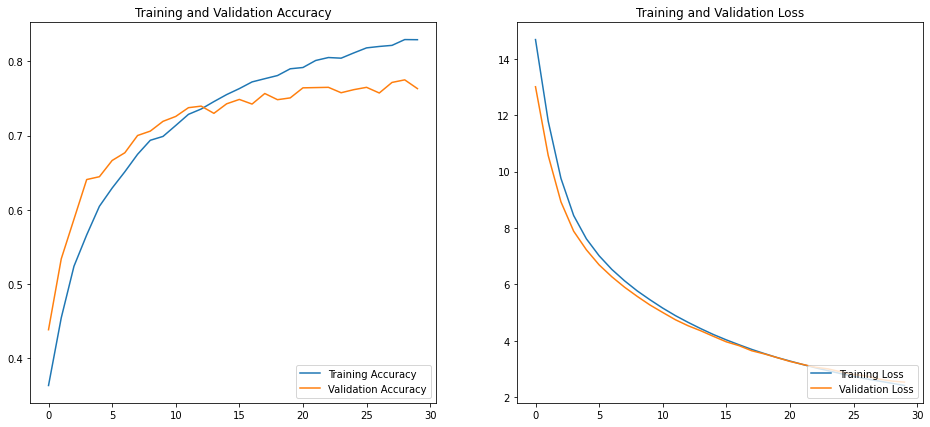

In [11]:
acc = vggHistory.history['accuracy']
valAcc = vggHistory.history['val_accuracy']

loss = vggHistory.history['loss']
valLoss = vggHistory.history['val_loss']

epochsRange = range(epochs)

plt.figure(figsize=(16, 7))
plt.subplot(1, 2, 1)
plt.plot(epochsRange, acc, label='Training Accuracy')
plt.plot(epochsRange, valAcc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochsRange, loss, label='Training Loss')
plt.plot(epochsRange, valLoss, label='Validation Loss')
plt.legend(loc='lower right')
plt.title('Training and Validation Loss')
plt.show()

In [12]:
baseModel.trainable = True

model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.000001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [13]:
epochs=30

vggHistory = model.fit(
  trainGenerator,
  validation_data=valGenerator,
  epochs=epochs
)

Epoch 1/30
360/360 [==============================] - 292s 794ms/step - loss: 2.3599 - accuracy: 0.8360 - val_loss: 2.4716 - val_accuracy: 0.7901
Epoch 2/30
360/360 [==============================] - 282s 782ms/step - loss: 2.2952 - accuracy: 0.8623 - val_loss: 2.4481 - val_accuracy: 0.7981
Epoch 3/30
360/360 [==============================] - 282s 783ms/step - loss: 2.2762 - accuracy: 0.8667 - val_loss: 2.4256 - val_accuracy: 0.8081
Epoch 4/30
360/360 [==============================] - 281s 782ms/step - loss: 2.2443 - accuracy: 0.8754 - val_loss: 2.4188 - val_accuracy: 0.8099
Epoch 5/30
360/360 [==============================] - 282s 783ms/step - loss: 2.2064 - accuracy: 0.8886 - val_loss: 2.3883 - val_accuracy: 0.8172
Epoch 6/30
360/360 [==============================] - 282s 782ms/step - loss: 2.1735 - accuracy: 0.9015 - val_loss: 2.3672 - val_accuracy: 0.8255
Epoch 7/30
360/360 [==============================] - 282s 783ms/step - loss: 2.1561 - accuracy: 0.9051 - val_loss: 2.3823 -

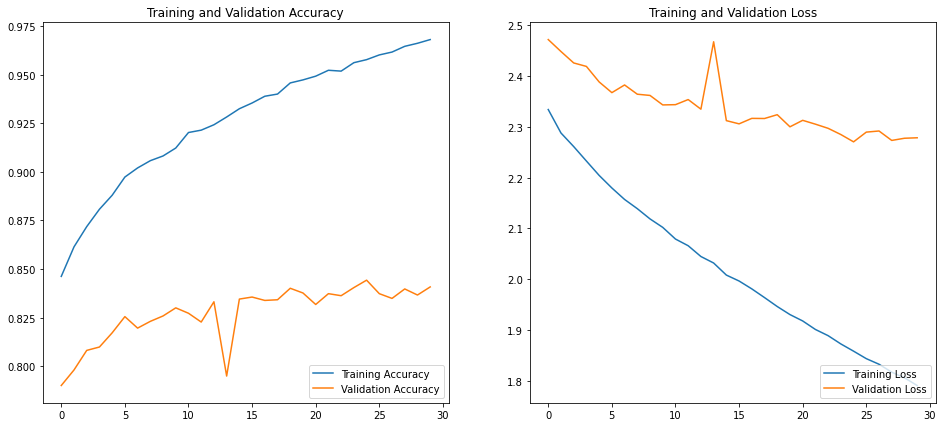

In [14]:
acc = vggHistory.history['accuracy']
valAcc = vggHistory.history['val_accuracy']

loss = vggHistory.history['loss']
valLoss = vggHistory.history['val_loss']

epochsRange = range(epochs)

plt.figure(figsize=(16, 7))
plt.subplot(1, 2, 1)
plt.plot(epochsRange, acc, label='Training Accuracy')
plt.plot(epochsRange, valAcc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochsRange, loss, label='Training Loss')
plt.plot(epochsRange, valLoss, label='Validation Loss')
plt.legend(loc='lower right')
plt.title('Training and Validation Loss')
plt.show()